<a href="https://colab.research.google.com/github/Aditya089081/DATA-SCIENCE-TOOLBOX-PYTHON-PROGRAMMING/blob/main/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Display Misssing values before handling.
# 2. Replace missing age value with median age.
# 3. Drop the cabin column.
# 4. Drop missing value after handling.
# 5. Display first few rows after the cleaned dataset.

import pandas as pd
import gspread
from google.colab import auth
from google.auth import default

# Authenticate and connect to Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Upload Titanic-Dataset.csv file manually in Colab or load from Google Drive
from google.colab import files
uploaded = files.upload()

# Read the CSV file
data = pd.read_csv("/content/Titanic-Dataset.csv")  # Replace #### with the correct file path

# 1. Display missing values before handling
print("1. Missing Values Before Handling:")
print(data.isnull().sum())

# 2. Replace missing 'Age' values with the median age
if 'Age' in data.columns:
    data['Age'].fillna(data['Age'].median(), inplace=True)

# 3. Drop the 'Cabin' column if it exists
if 'Cabin' in data.columns:
    data.drop(columns=['Cabin'], inplace=True)

# 4. Drop remaining rows with missing values
data.dropna(inplace=True)

# 5. Display the first few rows after cleaning
print("\n5. Cleaned Dataset:")
print(data.head())

# Save the cleaned dataset back to a new CSV file
data.to_csv("/content/Titanic-Dataset.csv", index=False)  # Replace #### with the desired file path

# Upload the cleaned file to Google Drive (Optional)
from google.colab import drive
drive.mount('/content/drive')
data.to_csv("/content/Titanic-Dataset.csv", index=False)  # Replace #### with Google Drive path

print("\nCleaned file saved at ####")  # Replace #### with the actual saved path


Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv
1. Missing Values Before Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

5. Cleaned Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch  

<ipython-input-2-0f796f84780d>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Cleaned file saved at ####


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Ensure this file is uploaded to Google Colab)
file_path = "/content/diabetes.csv"
data = pd.read_csv(file_path)

# 1. Data Cleaning
print("Missing Values Before Handling:")
print(data.isnull().sum())

# Fill missing numerical values with median
data.fillna(data.median(), inplace=True)

# Drop duplicate rows if any
data.drop_duplicates(inplace=True)

print("\nMissing Values After Handling:")
print(data.isnull().sum())

Missing Values Before Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing Values After Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# 2. Data Handling (Basic Statistics)
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00000

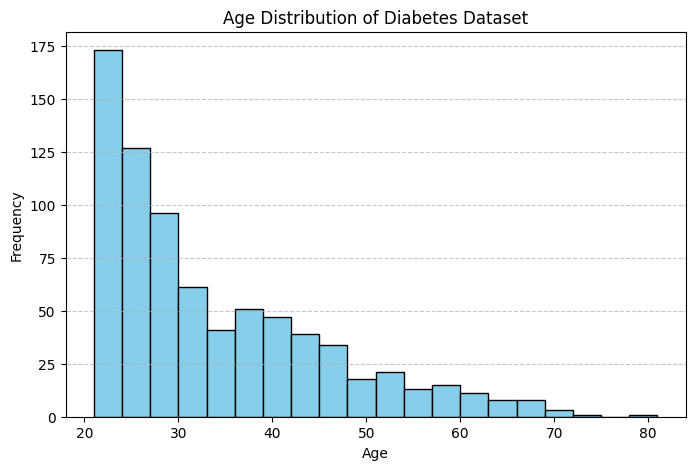

In [6]:
# 3. Data Visualization
plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Diabetes Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
